In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image,ImageStat
import glob
import math
import sys



In [ ]:
!unzip "/content/drive/Shareddrives/EEC193ATrackC/Data-Video-Anomoly/grapesvid2.v1-grapesvid2.yolov5pytorch.zip"

Archive:  /content/drive/Shareddrives/EEC193ATrackC/Data-Video-Anomoly/grapesvid2.v1-grapesvid2.yolov5pytorch.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/vinyardWalk_-_5_frame_00005_jpg.rf.90a58a12a0cdeefa550536ce29a47d99.jpg  
 extracting: test/images/vinyardWalk_-_5_frame_00019_jpg.rf.ec3e20b59dbc978721cb9db2c7b863ee.jpg  
 extracting: test/images/vinyardWalk_-_5_frame_00022_jpg.rf.2f6c3eab877820fce7d5cb0d9f2d1ca8.jpg  
 extracting: test/images/vinyardWalk_-_5_frame_00033_jpg.rf.9fc4c217da0c2b998f09ae6f9da78c74.jpg  
 extracting: test/images/vinyardWalk_-_5_frame_00034_jpg.rf.d53e560a3a35135bd7a54fcfdfebec40.jpg  
 extracting: test/images/vinyardWalk_-_5_frame_00036_jpg.rf.93b0478d61f7a91b8eea8bff8c1567c3.jpg  
 extracting: test/images/vinyardWalk_-_5_frame_00049_jpg.rf.4568d600f86b7000c75bfb45304b5517.jpg  
 extracting: test/images/vinyardWalk_-_5_frame_00062_jpg.rf.f120b1418654

In [ ]:
def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale


if __name__ == '__main__':
    for infile in glob.glob("/content/my_data3/img - Copyfull/*.jpg" ): 
      image = Image.open(infile)
      print("%s\t%s" % (infile, (calculate_brightness(image))*100))

In [ ]:
import cv2
# install imutils
!pip install imutils

In [ ]:
# get_image_feature_vectors.py#################################################
# Imports and function definitions
#################################################
# For running inference on the TF-Hub module with Tensorflow
import tensorflow as tf
import tensorflow_hub as hub# For saving 'feature vectors' into a txt file
import numpy as np# Glob for reading file names in a folder
import glob
import os.path
##################################################################################################
# This function:
# Loads the JPEG image at the given path
# Decodes the JPEG image to a uint8 W X H X 3 tensor
# Resizes the image to 224 x 224 x 3 tensor
# Returns the pre processed image as 224 x 224 x 3 tensor
#################################################
def load_img(path):# Reads the image file and returns data type of string
 img = tf.io.read_file(path)# Decodes the image to W x H x 3 shape tensor with type of uint8
 img = tf.io.decode_jpeg(img, channels=3)# Resizes the image to 224 x 224 x 3 shape tensor
 img = tf.image.resize_with_pad(img, 224, 224)# Converts the data type of uint8 to float32 by adding a new axis
 # img becomes 1 x 224 x 224 x 3 tensor with data type of float32
 # This is required for the mobilenet model we are using
 img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
 
 return img#################################################
# This function:
# Loads the mobilenet model in TF.HUB
# Makes an inference for all images stored in a local folder
# Saves each of the feature vectors in a file
#################################################
def get_image_feature_vectors():
 
 # Definition of module with using tfhub.dev
 module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
 # Loads the module
 module = hub.load(module_handle)# Loops through all images in a local folder
 for filename in glob.glob('/content/content/data/*.jpg'):
 
  print(filename)# Loads and pre-process the image
  img = load_img(filename)# Calculate the image feature vector of the img
  features = module(img)# Remove single-dimensional entries from the 'features' array  
  feature_set = np.squeeze(features)
 
  # Saves the image feature vectors into a file for later use
  outfile_name = os.path.basename(filename) + ".npz"
 
  out_path = os.path.join('./newData/',outfile_name)# Saves the 'feature_set' to a text file
  np.savetxt(out_path, feature_set, delimiter=',')

In [ ]:
get_image_feature_vectors()

In [ ]:
!pip3 install annoy

     |████████████████████████████████| 655kB 8.3MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391626 sha256=fe33e24166581fbeedc4d780ca4e254a82feaf7144f8ca1eb9c7531b79ee3e92
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
Successfully built annoy


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# Load images
image1 = cv2.imread('/content/content/data/0.jpg', 0)
image2 = cv2.imread('/content/content/data/1.jpg', 0)

# Create the sift object
sift = cv2.xfeatures2d.SIFT_create(700)

# Find keypoints and descriptors directly
kp1, des1 = sift.detectAndCompute(image2, None)
kp2, des2 = sift.detectAndCompute(image1, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

count = 0
# Ratio test as per Lowe's paper (0.7)
# Modify to change threshold 
for i,(m,n) in enumerate(matches):
    if m.distance < 0.15*n.distance:
        count += 1
        matchesMask[i]=[1,0]

# Draw lines
draw_params = dict(matchColor = (0,255,0),
                   # singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

# Display the matches
result = cv2.drawMatchesKnn(image2,kp1,image1,kp2,matches,None,**draw_params)
print('Matches:', count)
cv2_imshow('result', result)
cv2.waitKey()

Matches: 50


TypeError: ignored

In [ ]:
 !pip3 uninstall opencv-python
!pip3 install -U opencv-contrib-python

Uninstalling opencv-python-4.5.1.48:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.5.1.48.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Concurrent-21c64331.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Core-d92f2856.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Gui-ca084835.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Test-9d4ee57e.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Widgets-0e1d98b5.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5XcbQpa-70670cdb.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libX11-xcb-1ae4fd0e.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libavcodec-8daa01f

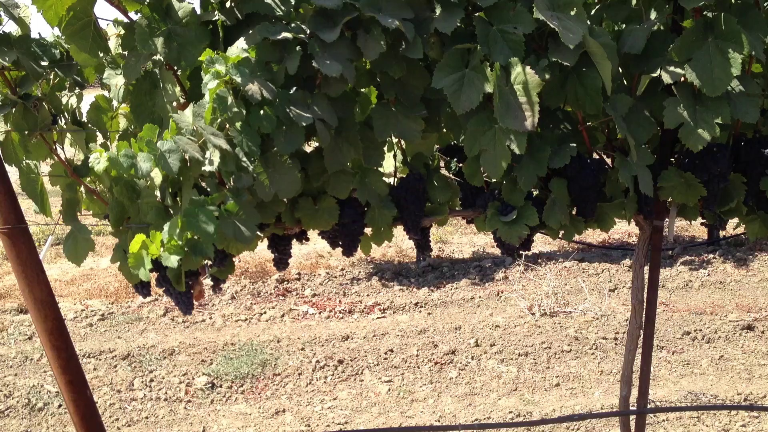

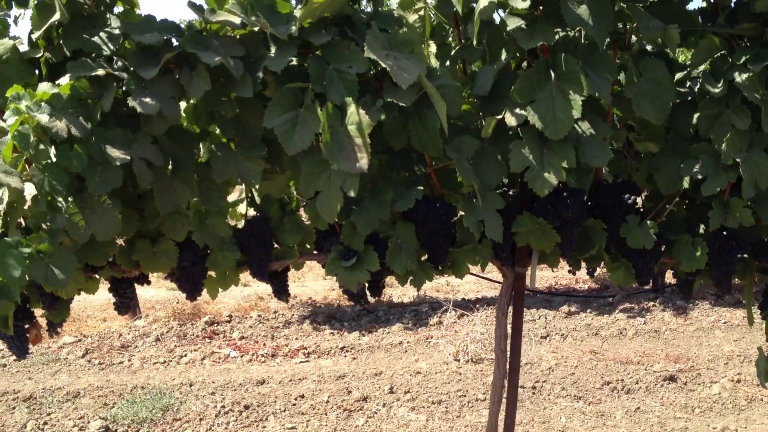

In [ ]:
from google.colab.patches import cv2_imshow
original = cv2.imread("/content/content/data/0.jpg")
image_to_compare = cv2.imread("/content/content/data/35.jpg")

cv2_imshow(cv2.resize(original, None, fx=0.4, fy=0.4))
cv2_imshow(cv2.resize(image_to_compare, None, fx=0.4, fy=0.4))

The images have same size and channels
Keypoints 1ST Image: 26691
Keypoints 2ND Image: 25160
GOOD Matches: 597
How good it's the match:  2.3728139904610495


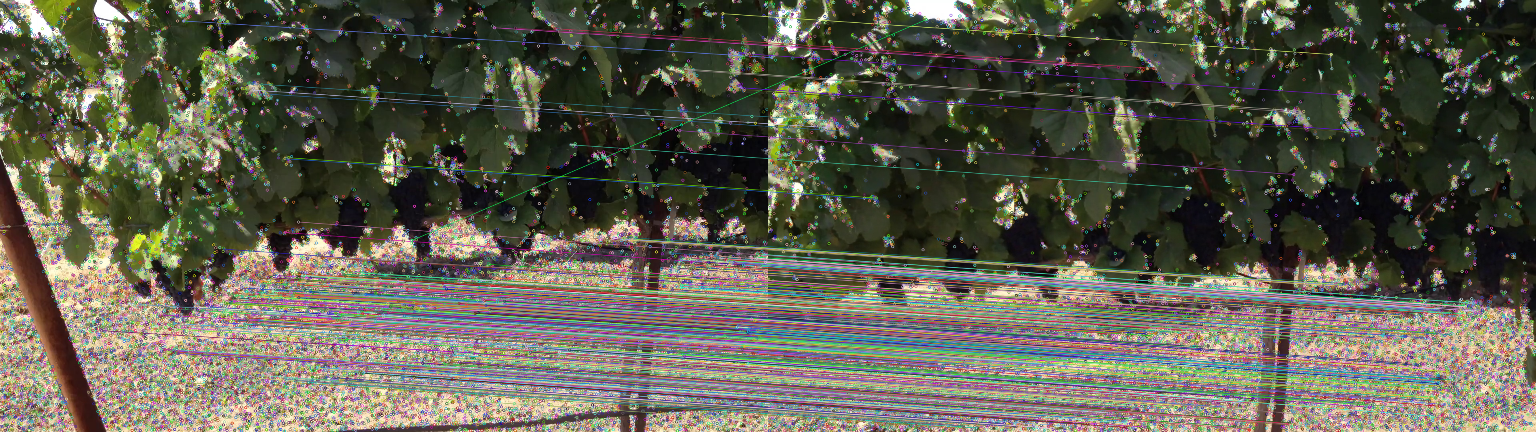

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


original = cv2.imread("/content/content/data/0.jpg")
image_to_compare = cv2.imread("/content/content/data/35.jpg")


# 1) Check if 2 images are equals
if original.shape == image_to_compare.shape:
    print("The images have same size and channels")
    difference = cv2.subtract(original, image_to_compare)
    b, g, r = cv2.split(difference)

    

# 2) Check for similarities between the 2 images
sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(original, None)
kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)

index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc_1, desc_2, k=2)

good_points = []
for m, n in matches:
    if m.distance < 0.5*n.distance:
        good_points.append(m)

# Define how similar they are
number_keypoints = 0
if len(kp_1) <= len(kp_2):
    number_keypoints = len(kp_1)
else:
    number_keypoints = len(kp_2)


print("Keypoints 1ST Image: " + str(len(kp_1)))
print("Keypoints 2ND Image: " + str(len(kp_2)))
print("GOOD Matches:", len(good_points))
print("How good it's the match: ", len(good_points) / number_keypoints * 100)

result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)


cv2_imshow(cv2.resize(result, None, fx=0.4, fy=0.4))
cv2.imwrite("feature_matching.jpg", result)


# cv2_imshow(cv2.resize(original, None, fx=0.4, fy=0.4))
# cv2_imshow(cv2.resize(image_to_compare, None, fx=0.4, fy=0.4))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
path = "/content"
temp = str(5) + ".jpg"
print(os.path.join(path, temp))

/content/5.jpg


In [ ]:
directory = '/content/train/images/'
print(sorted(os.listdir(directory)))


['vinyardWalk_-_5_frame_00000_jpg.rf.5501099cbe37d6fbf9f83283fdc0fdce.jpg', 'vinyardWalk_-_5_frame_00001_jpg.rf.27dab73161f70919800f135839d4fa54.jpg', 'vinyardWalk_-_5_frame_00002_jpg.rf.d3856223337cda8448c4e369ec1666c1.jpg', 'vinyardWalk_-_5_frame_00004_jpg.rf.e0a30e51c90d4ceb3c397a322cfd9698.jpg', 'vinyardWalk_-_5_frame_00006_jpg.rf.1d2160dfb62cb1404f5667677264cbda.jpg', 'vinyardWalk_-_5_frame_00007_jpg.rf.21849f3ff0d0ce075ac38bb7facc5587.jpg', 'vinyardWalk_-_5_frame_00009_jpg.rf.e23f717487791fb1d55589c6258eae33.jpg', 'vinyardWalk_-_5_frame_00011_jpg.rf.eab44b51fcaea030832cd9a358785c50.jpg', 'vinyardWalk_-_5_frame_00012_jpg.rf.c1539869e36c158b02d789f42ea8b456.jpg', 'vinyardWalk_-_5_frame_00013_jpg.rf.31bff75ee6e23fcc8c55321e4085bd46.jpg', 'vinyardWalk_-_5_frame_00014_jpg.rf.f110fe4349d2f66860fa5ef6706ba109.jpg', 'vinyardWalk_-_5_frame_00015_jpg.rf.41dca3badaddb8d30f3cf9ee3aa4e005.jpg', 'vinyardWalk_-_5_frame_00016_jpg.rf.71cf78e298fab08ff7a3936e476d19c2.jpg', 'vinyardWalk_-_5_frame_0

In [ ]:
 import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import string


#!cp new_path "/content/newfolder_path/“

path = "/content/train/images/"
good_size = 0

arr = []

for filename in sorted(os.listdir(path)):
    
  if (good_size < 300):

    new_path = (os.path.join(path, filename))
    original = cv2.imread(new_path)
    new_path1 = str(new_path)
    print("*************************************    REFERENCE IMAGE: ", new_path + "    *************************************")
    arr.append(new_path1) 
    good_size += 301
     
  else:
    image_to_compare = cv2.imread(os.path.join(path, filename))
    # 1) Check if 2 images are equals
    # if original.shape == image_to_compare.shape:
    #     print("The images have same size and channels")
    #     difference = cv2.subtract(original, image_to_compare)
    #     b, g, r = cv2.split(difference)

    # 2) Check for similarities between the 2 images
    sift = cv2.xfeatures2d.SIFT_create()
    kp_1, desc_1 = sift.detectAndCompute(original, None)
    kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)

    index_params = dict(algorithm=0, trees=5)
    search_params = dict()
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(desc_1, desc_2, k=2)

    good_points = []
    for m, n in matches:
        if m.distance < 0.5*n.distance:
            good_points.append(m)

    # Define how similar they are
    number_keypoints = 0
    if len(kp_1) <= len(kp_2):
        number_keypoints = len(kp_1)
    else:
        number_keypoints = len(kp_2)


    # print("Keypoints 1ST Image: " + str(len(kp_1)))
    # print("Keypoints 2ND Image: " + str(len(kp_2)))
    print("\n")
    print("GOOD Matches:", len(good_points))
    print("How good it's the match: ", len(good_points) / number_keypoints * 100)
    print("\n")
    good_size = len(good_points)

# result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)


# cv2_imshow(cv2.resize(result, None, fx=0.4, fy=0.4))
# cv2.imwrite("feature_matching.jpg", result)


# cv2_imshow(cv2.resize(original, None, fx=0.4, fy=0.4))
# cv2_imshow(cv2.resize(image_to_compare, None, fx=0.4, fy=0.4))

*************************************    REFERENCE IMAGE:  /content/train/images/vinyardWalk_-_5_frame_00000_jpg.rf.5501099cbe37d6fbf9f83283fdc0fdce.jpg    *************************************


GOOD Matches: 834
How good it's the match:  47.57558471192242




GOOD Matches: 775
How good it's the match:  44.209925841414716




GOOD Matches: 547
How good it's the match:  31.20365088419852




GOOD Matches: 408
How good it's the match:  23.27438676554478




GOOD Matches: 400
How good it's the match:  22.818026240730177




GOOD Matches: 298
How good it's the match:  16.99942954934398


*************************************    REFERENCE IMAGE:  /content/train/images/vinyardWalk_-_5_frame_00011_jpg.rf.eab44b51fcaea030832cd9a358785c50.jpg    *************************************


GOOD Matches: 852
How good it's the match:  49.07834101382488




GOOD Matches: 740
How good it's the match:  40.906578220011056




GOOD Matches: 636
How good it's the match:  36.530729465824244




GOOD Matches

In [ ]:
arr

['/content/train/images/vinyardWalk_-_5_frame_00000_jpg.rf.5501099cbe37d6fbf9f83283fdc0fdce.jpg',
 '/content/train/images/vinyardWalk_-_5_frame_00011_jpg.rf.eab44b51fcaea030832cd9a358785c50.jpg',
 '/content/train/images/vinyardWalk_-_5_frame_00025_jpg.rf.1e5701f02e61dbf18f599d41a23d29d2.jpg',
 '/content/train/images/vinyardWalk_-_5_frame_00035_jpg.rf.1823738f3c03eef1c6248bde0f95436a.jpg',
 '/content/train/images/vinyardWalk_-_5_frame_00042_jpg.rf.81057b7fe16eb2f5e162b430aa494d6a.jpg',
 '/content/train/images/vinyardWalk_-_5_frame_00048_jpg.rf.49272e9a5bd1d10bb8ae582e962c472d.jpg',
 '/content/train/images/vinyardWalk_-_5_frame_00056_jpg.rf.e5555c2cb89fa1403716e737622c38cf.jpg',
 '/content/train/images/vinyardWalk_-_5_frame_00063_jpg.rf.86f785a8655124bc5c6e0bbad6f3f41e.jpg',
 '/content/train/images/vinyardWalk_-_5_frame_00068_jpg.rf.519b3718fb8594e6baa52943b360906a.jpg',
 '/content/train/images/vinyardWalk_-_5_frame_00079_jpg.rf.be3e551eaa5e58e8f0ddac752e3fa85e.jpg',
 '/content/train/ima

In [ ]:
f = open("/content/drive/Shareddrives/EEC193ATrackC/yo.txt", "w")

for i in range((len(arr))):
    f.write(arr[i] + "\n")

f.close()